In [8]:
import numpy as np
import matplotlib.pyplot as plt

# pick a place on the greenland ice sheet. 
Go to [google maps](https://www.google.com/maps/@75.3384029,-47.0008339,3.87z) and pick your own glacier. 

In [9]:
lat = 68.7
lon = -33.1
buffer = 15000 #how large a region do we want to load-

### Define a helper function for reading parts of a map
This is a simple wrapper around xarray.

In [10]:
import xarray as xr
import numpy as np
from rasterio.warp import transform
#this code is copied from pyimgraft.
def geoimread(fname, roi_x=None, roi_y=None, roi_crs=None, buffer=0, band=0):
    """Reads a sub-region of a geotiff/geojp2/ that overlaps a region of interest (roi)

    This is a simple wrapper of xarray functionality.

    Parameters:
    fname (str) : file.
    roi_x, roi_y (List[float]) : region of interest.
    roi_crs (dict) : ROI coordinate reference system, in rasterio dict format (if different from scene coordinates)
    buffer (float) : adds a buffer around the region of interest.
    band (int) : which bands to read.

    Returns
        xr.core.dataarray.DataArray : The cropped scene.
    """
    da = xr.open_rasterio(fname)
    if roi_x is not None:
        if not hasattr(roi_x, "__len__"):
            roi_x = [roi_x]
            roi_y = [roi_y]
        if roi_crs is not None:
            if str(roi_crs) == "LL":
                roi_crs = {"init": "EPSG:4326"}
            # remove nans 
            roi_x = np.array(roi_x)
            roi_y = np.array(roi_y)
            ix = ~np.isnan(roi_x+roi_y)
            roi_x, roi_y = transform(
                src_crs=roi_crs, dst_crs=da.crs, xs=roi_x[ix], ys=roi_y[ix]
            )
        rows = (da.y > np.min(roi_y) - buffer) & (da.y < np.max(roi_y) + buffer)
        cols = (da.x > np.min(roi_x) - buffer) & (da.x < np.max(roi_x) + buffer)
        return da[band, rows, cols].squeeze()
    else:
        return da[band, :, :].squeeze()

## Load ice velocities in the region of interest

We use geoimread to read a small subset of the full data set. This function encapsulates xarray functionality to make it easier to use. The output are xarray datatypes.

In [11]:
vx = geoimread('https://sid.erda.dk/share_redirect/HUyCiE8JLN/MEaSUREs/M%20Multi-year%20IV%20mosaic%20v1/greenland_vel_mosaic250_vx_v1.tif',roi_y=lat, roi_x=lon,roi_crs='LL',buffer=buffer)
vx.data[vx<-1e9]=np.nan
vy = geoimread('https://sid.erda.dk/share_redirect/HUyCiE8JLN/MEaSUREs/M%20Multi-year%20IV%20mosaic%20v1/greenland_vel_mosaic250_vy_v1.tif',roi_y=lat, roi_x=lon,roi_crs='LL',buffer=buffer)
vy.data[vy<-1e9]=np.nan


## Visualize ice velocities
vx and vy are "xarray" types. xarray has some builtin visualization methods

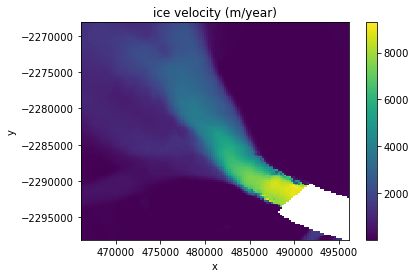

In [12]:
vv = np.sqrt(vx**2+vy**2)
vv.plot.imshow()  
plt.title('ice velocity (m/year)');

## Calculate velocity gradients.

In [13]:
dx = float(vx.x[2]-vx.x[1])
dy = float(vx.y[2]-vx.y[1])

dvxdx, dvxdy = np.gradient(vx.data, dx, dy)
dvydx, dvydy = np.gradient(vy.data, dx, dy)

## Calculate principal strain rates

Here you have to complete the code your self. 

In [14]:
#pre allocate an empty array. 
PrincipalStrain = vx+np.nan  #simply make an copy of vx so that we keep coordinate info etc.

for row in range(0,vx.shape[0]):
    for col in range(0,vx.shape[1]):
        # calculate eigenvalues from v-gradients in that point


        PrincipalStrain[row,col] = np.nan #put max eigen strain rate here...




## Visualize the results

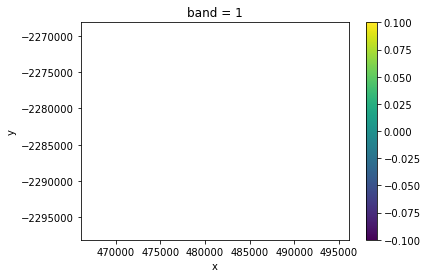

In [15]:
PrincipalStrain.plot.imshow()